In [1]:
# Import of packages and data

In [2]:
# Main libraries for data manipulation
import numpy as np 
import pandas as pd
pd.set_option('display.max_columns', None) # Show all the columns 
pd.set_option('display.max_rows', 66) 

# Libraries for data visualization
import plotly.express as px
import plotly.offline as pyo
pyo.init_notebook_mode()

# Useful libraries
import warnings
warnings.filterwarnings('ignore')

import fuzzywuzzy
from fuzzywuzzy import process


In [3]:
# Food and feed production worlwide dataset
fao_df = pd.read_csv('FAO.csv', encoding='latin-1')
df_prod = fao_df.copy()

# Greenhouse gases emission for food production dataset
emission_df = pd.read_csv('Food_Production.csv')
df_emiss = emission_df.copy()

# Temperatures change dataset
temperature_df = pd.read_csv('Environment_Temperature_change_E_All_Data_NOFLAG.csv', encoding='latin-1')
df_temp = temperature_df.copy()

# ISO-3 country code dataset
country_iso3 = pd.read_csv('FAOSTAT_data_11-24-2020.csv')

In [4]:
# Data Cleaning & Data Transformation

In [5]:
print(f"Shape of the dataframe: {df_prod.shape[0]} rows and {df_prod.shape[1]} columns.")
print("\nColumns in this dataframe:\n", df_prod.columns)
df_prod.head()

Shape of the dataframe: 21477 rows and 63 columns.

Columns in this dataframe:
 Index(['Area Abbreviation', 'Area Code', 'Area', 'Item Code', 'Item',
       'Element Code', 'Element', 'Unit', 'latitude', 'longitude', 'Y1961',
       'Y1962', 'Y1963', 'Y1964', 'Y1965', 'Y1966', 'Y1967', 'Y1968', 'Y1969',
       'Y1970', 'Y1971', 'Y1972', 'Y1973', 'Y1974', 'Y1975', 'Y1976', 'Y1977',
       'Y1978', 'Y1979', 'Y1980', 'Y1981', 'Y1982', 'Y1983', 'Y1984', 'Y1985',
       'Y1986', 'Y1987', 'Y1988', 'Y1989', 'Y1990', 'Y1991', 'Y1992', 'Y1993',
       'Y1994', 'Y1995', 'Y1996', 'Y1997', 'Y1998', 'Y1999', 'Y2000', 'Y2001',
       'Y2002', 'Y2003', 'Y2004', 'Y2005', 'Y2006', 'Y2007', 'Y2008', 'Y2009',
       'Y2010', 'Y2011', 'Y2012', 'Y2013'],
      dtype='object')


Area Abbreviation  Area Code         Area  Item Code  \
0               AFG          2  Afghanistan       2511   
1               AFG          2  Afghanistan       2805   
2               AFG          2  Afghanistan       2513   
3               AFG          2  Afghanistan       2513   
4               AFG          2  Afghanistan       2514   

                       Item  Element Code Element         Unit  latitude  \
0        Wheat and products          5142    Food  1000 tonnes     33.94   
1  Rice (Milled Equivalent)          5142    Food  1000 tonnes     33.94   
2       Barley and products          5521    Feed  1000 tonnes     33.94   
3       Barley and products          5142    Food  1000 tonnes     33.94   
4        Maize and products          5521    Feed  1000 tonnes     33.94   

   longitude   Y1961   Y1962   Y1963   Y1964   Y1965   Y1966   Y1967   Y1968  \
0      67.71  1928.0  1904.0  1666.0  1950.0  2001.0  1808.0  2053.0  2045.0   
1      67.71   183.0   183.0   182.0   220.0   220.0   195.0   231.0   235.0   
2      67.71    76.0    76.0    76.0    76.0    76.0    75.0    71.0    72.0   
3      67.71   237.0   237.0   237.0   238.0   238.0   237.0   225.0   227.0   
4      67.71   210.0   210.0   214.0   216.0   216.0   216.0   235.0   232.0   

    Y1969   Y1970   Y1971   Y1972   Y1973   Y1974   Y1975   Y1976   Y1977  \
0  2154.0  1819.0  1963.0  2215.0  2310.0  2335.0  2434.0  2512.0  2282.0   
1   238.0   213.0   205.0   233.0   246.0   246.0   255.0   263.0   235.0   
2    73.0    74.0    71.0    70.0    72.0    76.0    77.0    80.0    60.0   
3   230.0   234.0   223.0   219.0   225.0   240.0   244.0   255.0   185.0   
4   236.0   200.0   201.0   216.0   228.0   231.0   234.0   240.0   228.0   

    Y1978   Y1979   Y1980   Y1981   Y1982   Y1983   Y1984   Y1985   Y1986  \
0  2454.0  2443.0  2129.0  2133.0  2068.0  1994.0  1851.0  1791.0  1683.0   
1   254.0   270.0   259.0   248.0   217.0   217.0   197.0   186.0   200.0   
2    65.0    64.0    64.0    60.0    55.0    53.0    51.0    48.0    46.0   
3   203.0   198.0   202.0   189.0   174.0   167.0   160.0   151.0   145.0   
4   234.0   228.0   226.0   210.0   199.0   192.0   182.0   173.0   170.0   

    Y1987   Y1988   Y1989   Y1990   Y1991   Y1992   Y1993   Y1994   Y1995  \
0  2194.0  1801.0  1754.0  1640.0  1539.0  1582.0  1840.0  1855.0  1853.0   
1   193.0   202.0   191.0   199.0   197.0   249.0   218.0   260.0   319.0   
2    46.0    47.0    46.0    43.0    43.0    40.0    50.0    46.0    41.0   
3   145.0   148.0   145.0   135.0   132.0   120.0   155.0   143.0   125.0   
4   154.0   148.0   137.0   144.0   126.0    90.0   141.0   150.0   159.0   

    Y1996   Y1997   Y1998   Y1999   Y2000   Y2001   Y2002   Y2003   Y2004  \
0  2177.0  2343.0  2407.0  2463.0  2600.0  2668.0  2776.0  3095.0  3249.0   
1   254.0   326.0   347.0   270.0   372.0   411.0   448.0   460.0   419.0   
2    44.0    50.0    48.0    43.0    26.0    29.0    70.0    48.0    58.0   
3   138.0   159.0   154.0   141.0    84.0    83.0   122.0   144.0   185.0   
4   108.0    90.0    99.0    72.0    35.0    48.0    89.0    63.0   120.0   

    Y2005   Y2006   Y2007   Y2008   Y2009   Y2010   Y2011  Y2012  Y2013  
0  3486.0  3704.0  4164.0  4252.0  4538.0  4605.0  4711.0   4810   4895  
1   445.0   546.0   455.0   490.0   415.0   442.0   476.0    425    422  
2   236.0   262.0   263.0   230.0   379.0   315.0   203.0    367    360  
3    43.0    44.0    48.0    62.0    55.0    60.0    72.0     78     89  
4   208.0   233.0   249.0   247.0   195.0   178.0   191.0    200    200

In [6]:
# Delete unnecessary columns
df_prod.drop(columns=['Area Code', 'Item Code', 'Element Code', 'Unit'], inplace=True)

# Remove 'Y' from year's labels
df_prod.rename(columns={x:x[1:] for x in df_prod.columns if 'Y' in x}, inplace=True)

# Change the names of some labels
df_prod.rename(columns={'Area': 'country_name', 'Area Abbreviation':'country_code'}, inplace=True)

# Change in lower case all labels names
df_prod.rename(columns={x:x.lower() for x in df_prod.columns}, inplace=True)

In [7]:
# pd.DataFrame.info() in built function of pandas is a powerful tool, but in this case you get a disordered output. So, I built
# a summary table, easier to read, for Dtypes, unique values and missing values of every column
print("Dtype, Unique values and Missing values(%) of each column:")

df_prod_info= pd.DataFrame({"Dtype": df_prod.dtypes, 
                            "Unique values": df_prod.nunique(),
                            "Missing values(%)": round(df_prod.isnull().sum()/df_prod.shape[0]*100, 2)
                            }).rename_axis('Columns', axis='rows')                       

df_prod_info

Dtype, Unique values and Missing values(%) of each column:


Dtype  Unique values  Missing values(%)
Columns                                                
country_code   object            169               0.00
country_name   object            174               0.00
item           object            115               0.00
element        object              2               0.00
latitude      float64            173               0.00
longitude     float64            174               0.00
1961          float64           1197              16.48
1962          float64           1215              16.48
1963          float64           1209              16.48
1964          float64           1236              16.48
1965          float64           1259              16.48
1966          float64           1263              16.48
1967          float64           1283              16.48
1968          float64           1300              16.48
1969          float64           1309              16.48
1970          float64           1322              16.48
1971          float64           1351              16.48
1972          float64           1360              16.48
1973          float64           1374              16.48
1974          float64           1388              16.48
1975          float64           1405              16.48
1976          float64           1410              16.48
1977          float64           1411              16.48
1978          float64           1463              16.48
1979          float64           1473              16.48
1980          float64           1477              16.48
1981          float64           1469              16.48
1982          float64           1508              16.48
1983          float64           1528              16.48
1984          float64           1540              16.48
1985          float64           1538              16.48
1986          float64           1563              16.48
1987          float64           1592              16.48
1988          float64           1613              16.48
1989          float64           1622              16.48
1990          float64           1621              15.90
1991          float64           1632              15.90
1992          float64           1747               4.60
1993          float64           1785               2.85
1994          float64           1796               2.85
1995          float64           1796               2.85
1996          float64           1807               2.85
1997          float64           1810               2.85
1998          float64           1844               2.85
1999          float64           1859               2.85
2000          float64           1892               1.62
2001          float64           1881               1.62
2002          float64           1909               1.62
2003          float64           1935               1.62
2004          float64           1944               1.62
2005          float64           1963               1.62
2006          float64           1987               0.48
2007          float64           1994               0.48
2008          float64           2028               0.48
2009          float64           2029               0.48
2010          float64           2046               0.48
2011          float64           2081               0.48
2012            int64           2084               0.00
2013            int64           2107               0.00

In [8]:
# Create a subset of the dataframe containing at least one missing value in the rows
df_null_rows = df_prod.loc[df_prod.isnull().any(axis=1)]
print(f'\nNumber of rows with missing values: {df_null_rows.shape[0]}')

# Set a random seed to make this cell pseudorandomic and reproducible
np.random.seed(0)

# Select a random sample of 5 elements
df_null_rows.sample(5)


Number of rows with missing values: 3539


country_code        country_name                   item element  \
17328          SVK            Slovakia    Millet and products    Feed   
13020          MNE          Montenegro    Apples and products    Food   
17526          SVN            Slovenia                Pigmeat    Food   
11128          LVA              Latvia                   Beer    Food   
16103          RUS  Russian Federation  Coconuts - Incl Copra    Food   

       latitude  longitude  1961  1962  1963  1964  1965  1966  1967  1968  \
17328     48.67      19.70   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
13020     42.71      19.37   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
17526     46.15      15.00   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
11128     56.88      24.60   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
16103     61.52     105.32   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

       1969  1970  1971  1972  1973  1974  1975  1976  1977  1978  1979  1980  \
17328   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
13020   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
17526   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
11128   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
16103   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

       1981  1982  1983  1984  1985  1986  1987  1988  1989  1990  1991  1992  \
17328   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
13020   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
17526   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  49.0   
11128   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  88.0   
16103   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   0.0   

       1993  1994  1995  1996  1997  1998   1999  2000   2001   2002   2003  \
17328   1.0   1.0   1.0   1.0   0.0   0.0    1.0   1.0    1.0    1.0    1.0   
13020   NaN   NaN   NaN   NaN   NaN   NaN    NaN   NaN    NaN    NaN    NaN   
17526  81.0  84.0  75.0  70.0  73.0  77.0   87.0  76.0   82.0   78.0   88.0   
11128  53.0  66.0  67.0  66.0  73.0  82.0  100.0  99.0  105.0  134.0  142.0   
16103   0.0   1.0   1.0   2.0   2.0  10.0   10.0  21.0   28.0   42.0   45.0   

        2004   2005   2006   2007   2008   2009   2010   2011  2012  2013  
17328    2.0    0.0    0.0    1.0    1.0    1.0    0.0    1.0     1     1  
13020    NaN    NaN   11.0   19.0   34.0   38.0   33.0   27.0    14    13  
17526   88.0   88.0   89.0   84.0   84.0   80.0   81.0   76.0    69    58  
11128  124.0  144.0  147.0  158.0  156.0  146.0  164.0  172.0   163   156  
16103   47.0   52.0   45.0   59.0   42.0   39.0   48.0   63.0    57    63

In [9]:
# Create a copy of the dataframe to test the drop of rows with missing values
test_drop = df_prod.dropna()

# Calculate the percentage of deleted data 
rows_removal_perc = round((1-test_drop.shape[0]/df_prod.shape[0])*100,2)

print(f"\nRows in the original dataframe: {df_prod.shape[0]}.") 

print(f"\nDataframe rows after removing missing values: {test_drop.shape[0]}")

print(f'\nRemoving lines that contain NaN values has eliminated {rows_removal_perc}% of the data!')


Rows in the original dataframe: 21477.

Dataframe rows after removing missing values: 17938

Removing lines that contain NaN values has eliminated 16.48% of the data!


In [10]:
# Select a dataframe subset containing all the columns of production years
prod_values = test_drop.loc[:, '1961':]

# Get the indexes of rows containing at least one negative number and all 0 from 1961 to 2013
idx_to_drop = prod_values.loc[((prod_values < 0).any(axis=1)) | (prod_values == 0).all(axis=1)].index

# Delete all rows with these indexes
test_drop.drop(idx_to_drop, inplace=True)

# Rename the dataframe and reset the index
df_prod = test_drop.reset_index(drop=True)

# Transform number values to 'int64'
df_prod.loc[:, '1961':] = df_prod.loc[:, '1961':].astype('int64')

In [11]:
# Removing duplicates

In [12]:
df_prod.loc[df_prod.duplicated()].sample(5)

country_code          country_name                     item element  \
2189           CMR              Cameroon                     Eggs    Food   
442            ATG   Antigua and Barbuda  Milk - Excluding Butter    Food   
7469           JPN                 Japan  Milk - Excluding Butter    Food   
13884          ARE  United Arab Emirates  Milk - Excluding Butter    Food   
10212          NER                 Niger  Milk - Excluding Butter    Food   

       latitude  longitude    1961    1962    1963    1964    1965    1966  \
2189       7.37      12.35     2.0     2.0     2.0     3.0     3.0     4.0   
442       17.06     -61.80     6.0     5.0     5.0     5.0     5.0     4.0   
7469      36.20     138.25  2324.0  2740.0  3309.0  3679.0  3748.0  4083.0   
13884     23.42      53.85    14.0    14.0    14.0    14.0    14.0    18.0   
10212     17.61       8.08   189.0   196.0   202.0   209.0   216.0   230.0   

         1967    1968    1969    1970    1971    1972    1973    1974    1975  \
2189      4.0     5.0     5.0     5.0     5.0     5.0     5.0     6.0     6.0   
442       5.0     5.0     6.0     6.0     6.0     6.0     6.0     6.0     6.0   
7469   4699.0  4868.0  5241.0  5439.0  5331.0  5648.0  5710.0  5964.0  5693.0   
13884    19.0    21.0    24.0    27.0    28.0    33.0    55.0    78.0    73.0   
10212   237.0   243.0   258.0   283.0   270.0   238.0   225.0   242.0   275.0   

         1976    1977    1978    1979    1980    1981    1982    1983    1984  \
2189      6.0     6.0     6.0     6.0     7.0     7.0     8.0     9.0     7.0   
442       6.0     7.0     7.0     8.0     9.0     9.0     9.0     9.0     9.0   
7469   6456.0  7277.0  7912.0  8111.0  7905.0  7814.0  8098.0  8367.0  8426.0   
13884   126.0   129.0   149.0   183.0   219.0   197.0   232.0   225.0   278.0   
10212   300.0   302.0   312.0   328.0   330.0   351.0   357.0   411.0   329.0   

         1985    1986    1987    1988    1989    1990     1991     1992  \
2189      8.0    10.0     9.0     9.0    10.0    10.0      9.0     10.0   
442       9.0     8.0     8.0     9.0     9.0     9.0      8.0      9.0   
7469   8831.0  8774.0  8774.0  9509.0  9630.0  9540.0  10065.0  10222.0   
13884   243.0   245.0   300.0   300.0   299.0   319.0    322.0    361.0   
10212   286.0   287.0   297.0   317.0   305.0   417.0    387.0    445.0   

          1993     1994     1995     1996     1997     1998     1999     2000  \
2189      10.0     10.0     10.0      9.0     10.0     10.0      9.0     10.0   
442        8.0      9.0     10.0      9.0     10.0      9.0      9.0     10.0   
7469   10080.0  10026.0  10287.0  10371.0  10374.0  10230.0  10153.0  10270.0   
13884    363.0    364.0    345.0    372.0    333.0    322.0    406.0    432.0   
10212    472.0    477.0    529.0    533.0    556.0    595.0    611.0    633.0   

          2001     2002     2003     2004    2005    2006    2007    2008  \
2189      10.0     10.0     10.0      9.0     8.0     8.0     7.0     7.0   
442       10.0     10.0     10.0      8.0    10.0     9.0    11.0    11.0   
7469   10063.0  10086.0  10017.0  10040.0  9900.0  9593.0  9740.0  9406.0   
13884    363.0    495.0    511.0    467.0   441.0   555.0   739.0  1007.0   
10212    664.0    708.0    736.0    764.0   806.0   842.0   887.0   930.0   

         2009    2010    2011  2012  2013  
2189      8.0     8.0     8.0     8     9  
442      11.0    11.0    12.0    11    11  
7469   9357.0  9241.0  9071.0  9293  9162  
13884  1077.0  1025.0   983.0   976  1240  
10212   955.0   966.0   973.0  1050  1051

In [13]:
# Delete duplicates
df_prod.drop_duplicates(inplace=True)

# Reset index of the dataframe
df_prod.reset_index(drop=True, inplace=True)

In [14]:
def fuzz_finder(dictionary, test, target, treshold, first, last, show):

    """This function inserts in a dictionary at will the best matches between the names 
    of the elements of two lists, 'test' and 'target'. 
    Note: The dictionary must be already initialized before running the function.  

    The dictionary keys correspond to the names of the items to be tested, 
    while the values correspond to the list of items obtained for best match. 
    To test the elements of a list with itself it is sufficient to indicate it both as 'test' and as 'target'.
     
    You must specify a 'treshold', a number between 0 and 100, as the threshold score to be reached 
    between the first and second items in comparison. To perform a finer search, assign the value 'treshold'
    a number close to 100. By default the score refers to the comparison of the test element with the second target element.
    
    With 'first' and 'last' you decide the first and last item to be inserted in the list of values in the dictionary.  
    
    The resulting dictionary is transformed into a dataframe to improve the output. Setting 'show' = True 
    you can decide whether or not to display the output of the function.""" 

    for item in test:

        # Returns a list of tuples containing element's name and its score
        matches = fuzzywuzzy.process.extract(item, target, limit=None, scorer=fuzzywuzzy.fuzz.token_sort_ratio)
        
        if matches[1][1] >= treshold and first != last:        

            key = item 
            
            values = [(matches[n][0], matches[n][1]) for n in range(first,last+1)]
            
            dictionary[key] = values
        
        elif matches[1][1] >= treshold and first == last:

            key = item

            value = (matches[first][0], matches[first][1])

            dictionary[key] = value

    if show:

        df_result = pd.DataFrame.from_dict(dictionary)
        return df_result

In [15]:
# Initialize a dictionary where to insert the correspondences
country_dict = {}

# List of items to test
test_target_list = df_prod.country_name.unique()

# Best matches with the first 4 items in order of score
fuzz_finder(dictionary=country_dict, test=test_target_list, target=test_target_list, treshold=85, first=1, last=4, show=True)

Australia           Austria   Democratic People's Republic of Korea  \
0     (Austria, 88)   (Australia, 88)  (Lao People's Democratic Republic, 87)   
1  (Mauritania, 63)  (Costa Rica, 59)                 (Republic of Korea, 63)   
2   (Guatemala, 56)  (Mauritania, 59)        (Iran (Islamic Republic of), 52)   
3      (Israel, 53)     (Algeria, 57)                (Dominican Republic, 51)   

             Iceland            Ireland  \
0      (Ireland, 86)      (Iceland, 86)   
1      (Finland, 71)      (Finland, 71)   
2  (Switzerland, 67)  (Switzerland, 67)   
3     (Thailand, 67)     (Thailand, 67)   

              Lao People's Democratic Republic  
0  (Democratic People's Republic of Korea, 90)  
1                     (Dominican Republic, 56)  
2             (Iran (Islamic Republic of), 54)  
3     (Venezuela (Bolivarian Republic of), 47)

In [16]:
df_prod.country_name.replace({"C�te d'Ivoire":"Côte d'Ivoire"}, inplace=True)

In [17]:
# Initialize a dictionary where to insert the correspondences
item_dict = {}

# List of items to test
test_target_list = df_prod.item.unique()

# Best matches with the first 3 items in order of score. To display the outupt set 'show' = True
fuzz_finder(dictionary=item_dict, test=test_target_list, target=test_target_list, treshold=75, first=1, last=3, show=False)

In [18]:
# Resolve the inconsistency
df_prod.item.replace({'Beverages, Alcoholic':'Alcoholic Beverages'}, inplace=True)

In [19]:
df_prod = df_prod.melt(

    id_vars=['country_code', 'country_name', 'item', 'element', 'latitude', 'longitude'], 
    value_vars=[str(n) for n in range(1961, 2013+1)], 
    var_name="years", 
    value_name="production")

df_prod.head()

country_code country_name                      item element  latitude  \
0          AFG  Afghanistan        Wheat and products    Food     33.94   
1          AFG  Afghanistan  Rice (Milled Equivalent)    Food     33.94   
2          AFG  Afghanistan       Barley and products    Feed     33.94   
3          AFG  Afghanistan       Barley and products    Food     33.94   
4          AFG  Afghanistan        Maize and products    Feed     33.94   

   longitude years  production  
0      67.71  1961      1928.0  
1      67.71  1961       183.0  
2      67.71  1961        76.0  
3      67.71  1961       237.0  
4      67.71  1961       210.0

In [20]:
print(f"Shape of the dataframe: {df_emiss.shape[0]} rows and {df_emiss.shape[1]} columns.")
print("\nColumns in this dataframe:\n", df_emiss.columns)

df_emiss.head()

Shape of the dataframe: 43 rows and 23 columns.

Columns in this dataframe:
 Index(['Food product', 'Land use change', 'Animal Feed', 'Farm', 'Processing',
       'Transport', 'Packging', 'Retail', 'Total_emissions',
       'Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)',
       'Eutrophying emissions per kilogram (gPO₄eq per kilogram)',
       'Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)',
       'Freshwater withdrawals per 1000kcal (liters per 1000kcal)',
       'Freshwater withdrawals per 100g protein (liters per 100g protein)',
       'Freshwater withdrawals per kilogram (liters per kilogram)',
       'Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)',
       'Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)',
       'Land use per 1000kcal (m² per 1000kcal)',
       'Land use per kilogram (m² per kilogram)',
       'Land use per 100g protein (m² per 100g protein)',
       'Scarcity-weighted water use per kilogram 

Food product  Land use change  Animal Feed  Farm  Processing  \
0  Wheat & Rye (Bread)              0.1          0.0   0.8         0.2   
1         Maize (Meal)              0.3          0.0   0.5         0.1   
2        Barley (Beer)              0.0          0.0   0.2         0.1   
3              Oatmeal              0.0          0.0   1.4         0.0   
4                 Rice              0.0          0.0   3.6         0.1   

   Transport  Packging  Retail  Total_emissions  \
0        0.1       0.1     0.1              1.4   
1        0.1       0.1     0.0              1.1   
2        0.0       0.5     0.3              1.1   
3        0.1       0.1     0.0              1.6   
4        0.1       0.1     0.1              4.0   

   Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)  \
0                                                NaN          
1                                                NaN          
2                                                NaN          
3                                           4.281357          
4                                           9.514379          

   Eutrophying emissions per kilogram (gPO₄eq per kilogram)  \
0                                                NaN          
1                                                NaN          
2                                                NaN          
3                                              11.23          
4                                              35.07          

   Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)  \
0                                                NaN                       
1                                                NaN                       
2                                                NaN                       
3                                           8.638462                       
4                                          49.394366                       

   Freshwater withdrawals per 1000kcal (liters per 1000kcal)  \
0                                                NaN           
1                                                NaN           
2                                                NaN           
3                                         183.911552           
4                                         609.983722           

   Freshwater withdrawals per 100g protein (liters per 100g protein)  \
0                                                NaN                   
1                                                NaN                   
2                                                NaN                   
3                                         371.076923                   
4                                        3166.760563                   

   Freshwater withdrawals per kilogram (liters per kilogram)  \
0                                                NaN           
1                                                NaN           
2                                                NaN           
3                                              482.4           
4                                             2248.4           

   Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)  \
0                                                NaN              
1                                                NaN              
2                                                NaN              
3                                           0.945482              
4                                           1.207271              

   Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)  \
0                                                NaN                      
1                                                NaN                      
2                                                NaN                      
3                                           1.907692                      
4                                           6.267606          

In [21]:
print("Dtype, Unique values and Missing values(%) of each column:")

emission_df_info= pd.DataFrame({"Dtype": df_emiss.dtypes, 
                            "Unique values": df_emiss.nunique(),
                            "Missing values(%)": round(df_emiss.isnull().sum()/df_emiss.shape[0]*100, 2)
                            }).rename_axis('Columns', axis='rows')                       

emission_df_info.sort_values(by='Missing values(%)')

Dtype, Unique values and Missing values(%) of each column:


Dtype  Unique values  \
Columns                                                                      
Food product                                         object             43   
Land use change                                     float64             21   
Animal Feed                                         float64             10   
Farm                                                float64             24   
Processing                                          float64             10   
Transport                                           float64              8   
Packging                                            float64             10   
Retail                                              float64              4   
Total_emissions                                     float64             33   
Eutrophying emissions per kilogram (gPO₄eq per ...  float64             38   
Scarcity-weighted water use per kilogram (liter...  float64             38   
Land use per kilogram (m² per kilogram)             float64             38   
Freshwater withdrawals per kilogram (liters per...  float64             38   
Eutrophying emissions per 1000kcal (gPO₄eq per ...  float64             33   
Land use per 1000kcal (m² per 1000kcal)             float64             33   
Greenhouse gas emissions per 1000kcal (kgCO₂eq ...  float64             33   
Scarcity-weighted water use per 1000kcal (liter...  float64             30   
Freshwater withdrawals per 1000kcal (liters per...  float64             30   
Land use per 100g protein (m² per 100g protein)     float64             27   
Greenhouse gas emissions per 100g protein (kgCO...  float64             27   
Eutrophying emissions per 100g protein (gPO₄eq ...  float64             27   
Freshwater withdrawals per 100g protein (liters...  float64             26   
Scarcity-weighted water use per 100g protein (l...  float64             26   

                                                    Missing values(%)  
Columns                                                                
Food product                                                     0.00  
Land use change                                                  0.00  
Animal Feed                                                      0.00  
Farm                                                             0.00  
Processing                                                       0.00  
Transport                                                        0.00  
Packging                                                         0.00  
Retail                                                           0.00  
Total_emissions                                                  0.00  
Eutrophying emissions per kilogram (gPO₄eq per ...              11.63  
Scarcity-weighted water use per kilogram (liter...              11.63  
Land use per kilogram (m² per kilogram)                         11.63  
Freshwater withdrawals per kilogram (liters per...              11.63  
Eutrophying emissions per 1000kcal (gPO₄eq per ...              23.26  
Land use per 1000kcal (m² per 1000kcal)                         23.26  
Greenhouse gas emissions per 1000kcal (kgCO₂eq ...              23.26  
Scarcity-weighted water use per 1000kcal (liter...              30.23  
Freshwater withdrawals per 1000kcal (liters per...              30.23  
Land use per 100g protein (m² per 100g protein)                 37.21  
Greenhouse gas emissions per 100g protein (kgCO...              37.21  
Eutrophying emissions per 100g protein (gPO₄eq ...              37.21  
Freshwater withdrawals per 100g protein (liters...              39.53  
Scarcity-weighted water use per 100g protein (l...              39.53

In [22]:
# List of columns to delete
columns_to_delete = [n for n in df_emiss.columns if '(' in n]

df_emiss.drop(columns=(columns_to_delete), inplace=True)

# Delete spaces in labels and change them in lower case
df_emiss.rename(columns={x:x.replace(' ', '_').lower() for x in df_emiss.columns}, inplace=True)

df_emiss.rename(columns={'land_use_change':'land_use'}, inplace=True)

In [23]:
# Create an array consisting of the difference between total_emission and land_use values
difference = df_emiss.total_emissions.values - df_emiss.land_use.values

# Replace the correct values in the 'total_emissions' column
df_emiss.total_emissions = difference

df_emiss.head()

food_product  land_use  animal_feed  farm  processing  transport  \
0  Wheat & Rye (Bread)       0.1          0.0   0.8         0.2        0.1   
1         Maize (Meal)       0.3          0.0   0.5         0.1        0.1   
2        Barley (Beer)       0.0          0.0   0.2         0.1        0.0   
3              Oatmeal       0.0          0.0   1.4         0.0        0.1   
4                 Rice       0.0          0.0   3.6         0.1        0.1   

   packging  retail  total_emissions  
0       0.1     0.1              1.3  
1       0.1     0.0              0.8  
2       0.5     0.3              1.1  
3       0.1     0.0              1.6  
4       0.1     0.1              4.0

In [24]:
# Select the dataframe subset without standard deviation values
df_temp = df_temp.loc[df_temp.Element == 'Temperature change']

# Delete unnecessary columns 
df_temp.drop(columns=['Area Code', 'Months Code', 'Element Code', 'Element', 'Unit'], inplace=True)

# Remove 'Y' from year's labels
df_temp.rename(columns={x:x[1:] for x in df_temp.columns if 'Y' in x}, inplace=True)

# Change the names of 'Area' and 'Months' columns
df_temp.rename(columns={'Area': 'country_name', 'Months':'months'}, inplace=True)

In [25]:
# Get the indixes of the rows that contain at least a null value from 1961 to 2019
index_nan = df_temp.loc[df_temp.isnull().any(axis=1), '1961':].index

# Delete all rows with these indexes
df_temp.drop(index_nan, inplace=True)

In [26]:
df_temp.loc[df_temp.duplicated()]

Empty DataFrame
Columns: [country_name, months, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
Index: []

In [27]:
# Fix decryption errors
df_temp.months.replace({
    'Mar\x96Apr\x96May': 'Spring',
    'Jun\x96Jul\x96Aug':'Summer',
    'Sep\x96Oct\x96Nov':'Fall',
    'Dec\x96Jan\x96Feb': 'Winter', 
    }, inplace=True)

# Get the indixes of the rows to be deleted
china_index = df_temp.loc[df_temp.country_name == 'China'].index

# Delete the rows
df_temp.drop(china_index, inplace=True)

# Reset the index
df_temp.reset_index(drop=True, inplace=True)


In [28]:
# First check the dataset containing the ISO-3 codes to add to the temperature dataset
country_iso3.head()

Country Code        Country  M49 Code ISO2 Code ISO3 Code  Start Year  \
0             2    Afghanistan       4.0        AF       AFG         NaN   
1          5100         Africa       2.0       NaN       X06         NaN   
2           284  Åland Islands     248.0       NaN       ALA         NaN   
3             3        Albania       8.0        AL       ALB         NaN   
4             4        Algeria      12.0        DZ       DZA         NaN   

   End Year  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN

In [29]:
# Delete unnecessary columns
country_iso3.drop(columns=['Country Code', 'M49 Code', 'ISO2 Code', 'Start Year', 'End Year'], inplace=True)

# Rename useful columns
country_iso3.rename(columns={'Country':'country_name','ISO3 Code':'country_code'},inplace=True)

# 'China, mainland' does not have the ISO3 code. Fix the problem by creating a filter...
filter_china = country_iso3['country_name'] == 'China, mainland'

# ...and replace the ISO3 code 'CHN' to the right place
country_iso3[filter_china] = country_iso3[filter_china].fillna('CHN') 

In [30]:
### Data Exploration & Data Visualization

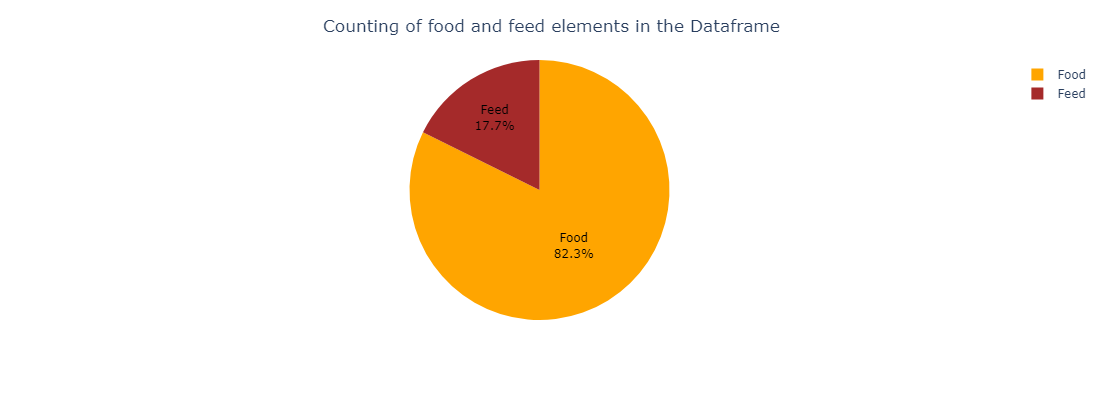

In [31]:
elements = df_prod.element.value_counts()

fig = px.pie(
    values=elements.values, 
    names=elements.index,
    
    color=elements.index,
    color_discrete_map={
        'Feed':'brown',
        'Food':'orange'})

fig.update_traces(
    textinfo='label+percent',
    insidetextfont = dict(color = 'black'))

fig.update_layout(
    width=500,
    height=400,
    
    title='Counting of food and feed elements in the Dataframe',
    title_x = 0.5,
    title_y = 0.95,
    title_xanchor='center',
    title_yanchor='top',

    showlegend= True,
    legend_itemclick=False)

fig.show()

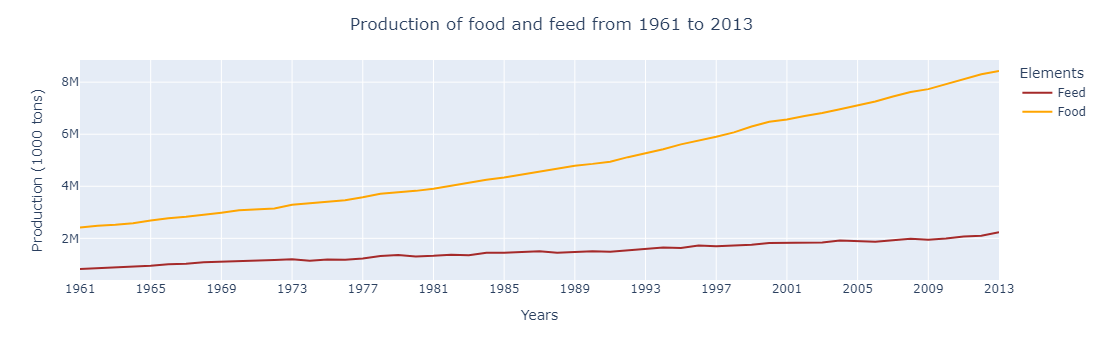

In [32]:
# # Group together all food and feed items and sum the production values of each year
food_feed_prod = df_prod.groupby(['element', 'years'])['production'].sum().reset_index()

fig = px.line(
    food_feed_prod, 
    x="years",
    y="production", 
    
    color='element',
    color_discrete_map={
        'Feed':'brown',
        'Food':'orange'},
    
    labels=dict(
        element='Elements',
        years='Years',
        production='Production'))

fig.update_layout(
    width=900,

    title='Production of food and feed from 1961 to 2013',
    title_x = 0.5,
    title_y = 0.95,
    title_xanchor='center',
    title_yanchor='top',

    showlegend= True,
    legend_itemclick=False,

    yaxis = dict(title='Production (1000 tons)'),
    xaxis = dict(
        tickmode = 'linear',
        tick0 = 0, 
        dtick = 4)) # Reducing ticks for cleaner graphic output   

fig.show()

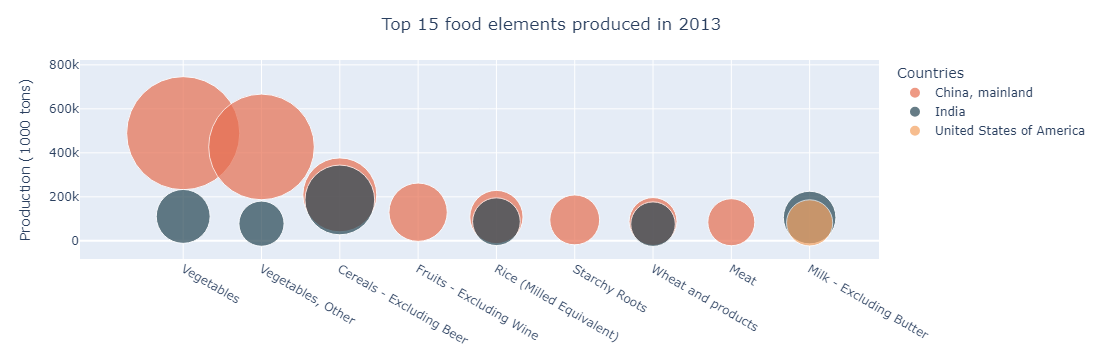

In [33]:
# Create a filter for 'Food' related elements
filter_item = df_prod.element == 'Food'

# Create a filter for '2013' production year
filter_year = df_prod.years == '2013'

# Create a dataframe subset with conditions imposed by filters and with columns concerning food, countries and production values
food_2013 = df_prod.loc[(filter_item) & (filter_year), ['item', 'country_name', 'production']]

# Sort values in decreasing order and select the first 15 elements
food_2013 = food_2013.sort_values(by='production', ascending=False).reset_index(drop=True).head(15)

fig = px.scatter(
    food_2013, 
    x='item',
    y='production',

    size='production',
    size_max=80,
    
    color='country_name',
    color_discrete_map={
        'China, mainland': '#e76f51',
        'United States of America': '#f4a261',
        'India': '#264653'},

    hover_name='country_name',
    hover_data=dict(country_name = False),

    labels=dict(
        item='Item',
        production='Production'))

fig.update_layout(
    title = 'Top 15 food elements produced in 2013',
    title_x = 0.5,
    title_y = 0.95,
    title_xanchor='center',
    title_yanchor='top',

    legend_title_text='Countries',
    legend_title_side = 'top',
    showlegend= True,
    legend_itemclick='toggle',

    yaxis = dict(title='Production (1000 tons)'),
    xaxis = dict(title=None))

fig.show()

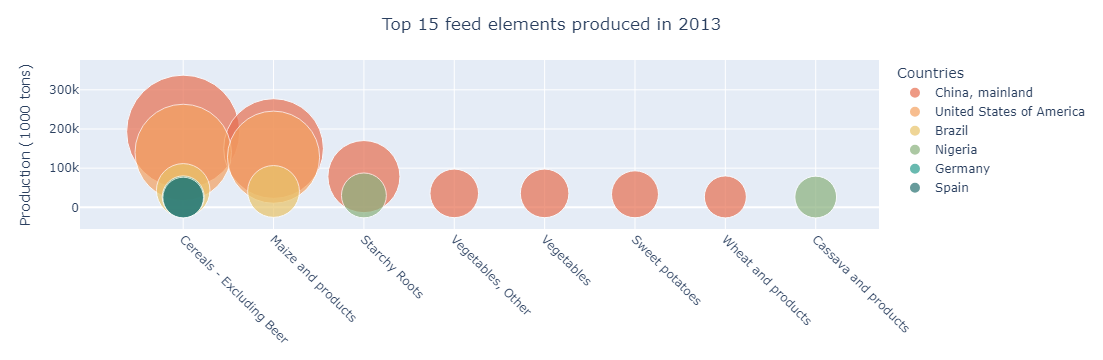

In [34]:
# Create a filter for 'Feed' related elements
filter_item = df_prod.element == 'Feed'

# Create a filter for '2013' production year
filter_year = df_prod.years == '2013'

# Create a dataframe subset with conditions imposed by filters and with columns concerning feed, countries and production values
feed_2013 = df_prod.loc[(filter_item) & (filter_year), ['item','country_name', 'production']]

# Sort values in decreasing order and select the first 15 elements
feed_2013 = feed_2013.sort_values(by='production', ascending=False).reset_index(drop=True).head(15)

fig = px.scatter(
    feed_2013, 
    x='item',
    y='production',

    size='production',
    size_max=80,
    
    color='country_name',
    color_discrete_map={
        'China, mainland': '#e76f51',
        'United States of America': '#f4a261',
        'Brazil': '#e9c46a',
        'Nigeria': '#8ab17d',
        'Germany': '#2a9d8f',
        'Spain': '#287271',
        'Canada': '#264653'},

    hover_name='country_name',
    hover_data=dict(country_name = False),
    
    labels=dict(
        item='Item',
        production='Production'))

fig.update_layout(
    title = 'Top 15 feed elements produced in 2013',
    title_x = 0.5,
    title_y = 0.95,
    title_xanchor='center',
    title_yanchor='top',

    legend_title_text='Countries',
    legend_title_side = 'top',
    showlegend= True,
    legend_itemclick='toggle',

    yaxis = dict(title='Production (1000 tons)'),
    xaxis = dict(
        title=None, 
        tickangle=45))

fig.show()

In [35]:
# The fastest strategy I have devised to merge the food and feed data I am interested in is to create two dataframes 
# separately and then join them together. 

# Create a filter for the country
country_filter = df_prod.country_name == 'China, mainland'

# Create a filter to collect the food items that interest me
food_items = df_prod.item.isin(['Vegetables', 'Vegetables, Other', 'Cereals - Excluding Beer'])

# Create a filter for 'Food' related elements
food_filter = df_prod.element == 'Food'

# Create a dataframe subset using filters and columns I need
china_food = df_prod.loc[(country_filter) & (food_items) & (food_filter), ['element', 'item', 'country_name', 'production', 'years']]

# Sorto 'years' and 'production' values and reset index
china_food = china_food.sort_values(by=['years', 'production']).reset_index(drop=True)

# Create a filter to collect the feed items that interest me
feed_items = df_prod.item.isin(['Cereals - Excluding Beer', 'Maize and products', 'Starchy Roots'])

# Create a filter for 'Feed' related elements
feed_filter = df_prod.element == 'Feed'

# As before, create a dataframe subset using filters specified for feed elements
china_feed = df_prod.loc[(country_filter) & (feed_items) & (feed_filter), ['element', 'item', 'country_name', 'production', 'years']]

china_feed = china_feed.sort_values(by=['years', 'production']).reset_index(drop=True)

# Concatenate the two dataframes  
chn_food_feed = pd.concat([china_feed, china_food]).reset_index(drop=True)

chn_food_feed.iloc[np.r_[0:3, 159:162]]

element                      item     country_name  production years
0      Feed             Starchy Roots  China, mainland      8179.0  1961
1      Feed        Maize and products  China, mainland     13700.0  1961
2      Feed  Cereals - Excluding Beer  China, mainland     17963.0  1961
159    Food         Vegetables, Other  China, mainland     44728.0  1961
160    Food                Vegetables  China, mainland     52968.0  1961
161    Food  Cereals - Excluding Beer  China, mainland     59256.0  1961

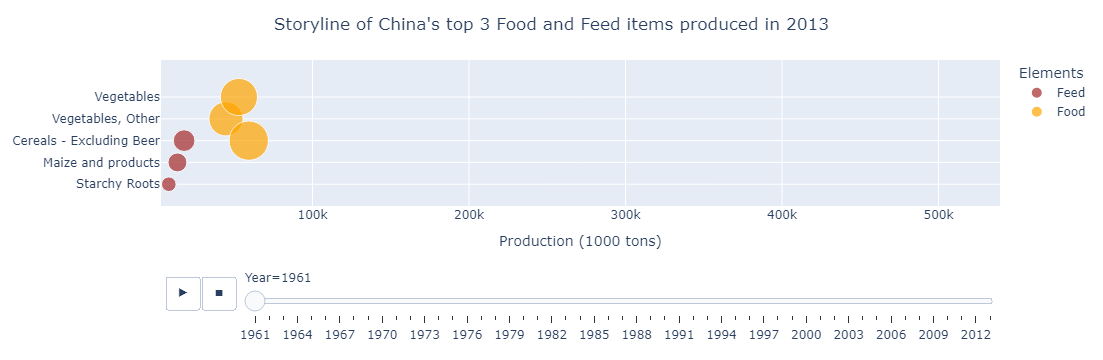

In [36]:
fig = px.scatter(
    data_frame=chn_food_feed, 
    x='production',
    y='item',
    size='production',
    size_max=80,
    animation_frame='years',

    color='element',
    color_discrete_map={
        'Feed':'brown',
        'Food':'orange'},

    hover_name='item',
    hover_data=dict(
        item = False, 
        element = False),    

    range_x=[chn_food_feed.production.min()-5000, chn_food_feed.production.max()+50000],
    range_y=[-1, 5.7],
    
    labels=dict(
        years='Year',
        production='Production',
        element='Elements'))

fig.update_layout(
    title="Storyline of China's top 3 Food and Feed items produced in 2013",
    title_x = 0.5,
    title_y = 0.95,
    title_xanchor='center',
    title_yanchor='top',

    legend_title_text='Elements',

    xaxis = dict(title='Production (1000 tons)'),
    yaxis = dict(title=None))

# This code speeds up the animation
fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 250
fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 250

fig.show()

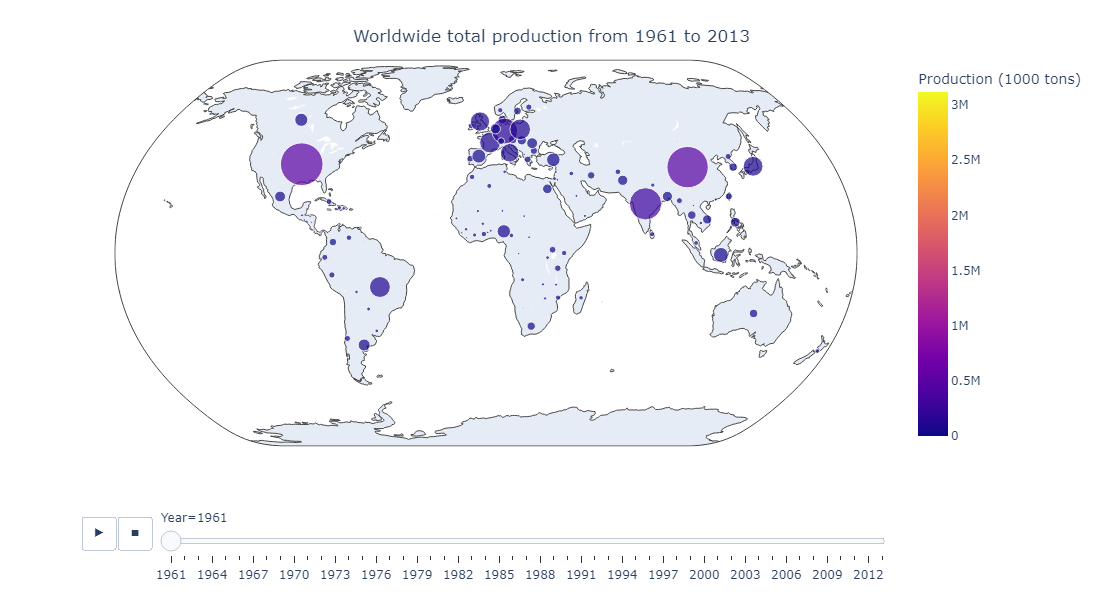

In [37]:
# Add the production of the various countries, regardless of the differentiation between food and feed
global_prod = df_prod.groupby(['country_name', 'latitude', 'longitude', 'years'])['production'].sum().reset_index()

fig = px.scatter_geo(
    global_prod,
    lat='latitude',
    lon='longitude',
    color='production',
    color_continuous_scale='plasma',
    size = 'production',
    size_max=75,
    
    hover_name='country_name',
    hover_data=dict(
        latitude=None,
        longitude=None),

    animation_frame='years',
    projection='natural earth',

    range_color=[global_prod.production.min(), global_prod.production.max()],
    
    labels=dict(
        production='Production (1000 tons)',
        years='Year'),)

fig.update_layout(    
    title = 'Worldwide total production from 1961 to 2013',
    title_x = 0.5,
    title_y = 0.95,
    title_xanchor='center',
    title_yanchor='top',

    dragmode=False,

    width=1000,
    height=600)

fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 250
fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 80

fig.show()

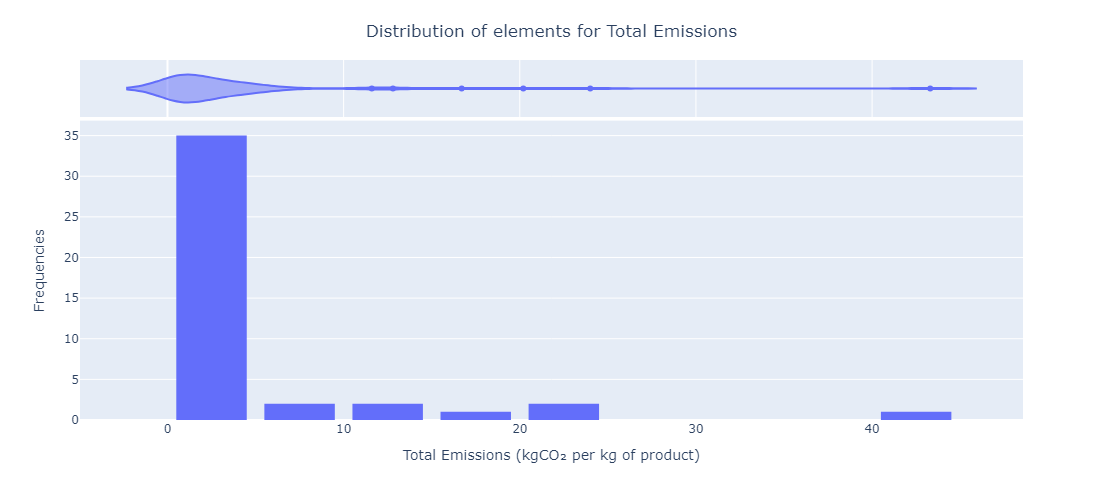

animal_feed  farm  processing  transport  packging  retail  \
count         43.0  43.0        43.0       43.0      43.0    43.0   
mean           0.5   3.5         0.3        0.2       0.3     0.1   
std            0.9   7.1         0.4        0.2       0.3     0.1   
min            0.0   0.1         0.0        0.0       0.0     0.0   
25%            0.0   0.4         0.0        0.1       0.1     0.0   
50%            0.0   0.8         0.1        0.1       0.1     0.0   
75%            0.0   2.2         0.3        0.2       0.3     0.2   
max            2.9  39.4         1.3        0.8       1.6     0.3   

       total_emissions  
count             43.0  
mean               4.7  
std                8.1  
min                0.3  
25%                0.8  
50%                1.6  
75%                4.2  
max               43.3

In [38]:
fig = px.histogram(    
    data_frame=df_emiss,
    x='total_emissions',

    marginal='violin')

fig.update_layout(
    width=750,
    height=500,
    bargap=0.2,

    title='Distribution of elements for Total Emissions',
    title_x = 0.5,
    title_y = 0.95,
    title_xanchor='center',
    title_yanchor='top',
        
    xaxis = dict(title='Total Emissions (kgCO₂ per kg of product)'),
    yaxis = dict(title='Frequencies'))

fig.show()

emission_stat = df_emiss.loc[:, 'animal_feed':].describe().round(1) # Exclude the 'land_use' column from the statistics
emission_stat

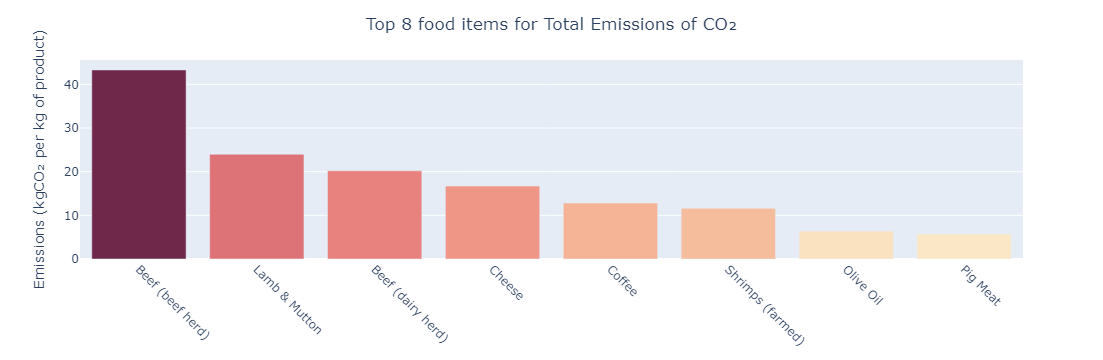

In [39]:
# Create a dataframe subset using only top 8 elements with highest total emissions values
top_8_emiss = df_emiss.sort_values(by='total_emissions', ascending=False).head(8)

fig = px.bar(
    top_8_emiss,
    x='food_product',
    y='total_emissions',

    color='total_emissions',
    color_continuous_scale='Burgyl',
    
    hover_name='total_emissions',
    hover_data=dict(
        total_emissions=None,
        food_product=None))


fig.update_layout(
    coloraxis_showscale=False,

    title = 'Top 8 food items for Total Emissions of CO₂',
    title_x = 0.5,
    title_y = 0.95,
    title_xanchor='center',
    title_yanchor='top',

    yaxis = dict(title='Emissions (kgCO₂ per kg of product)'),
    xaxis = dict(
        title=None, 
        tickangle=45))    

fig.show()

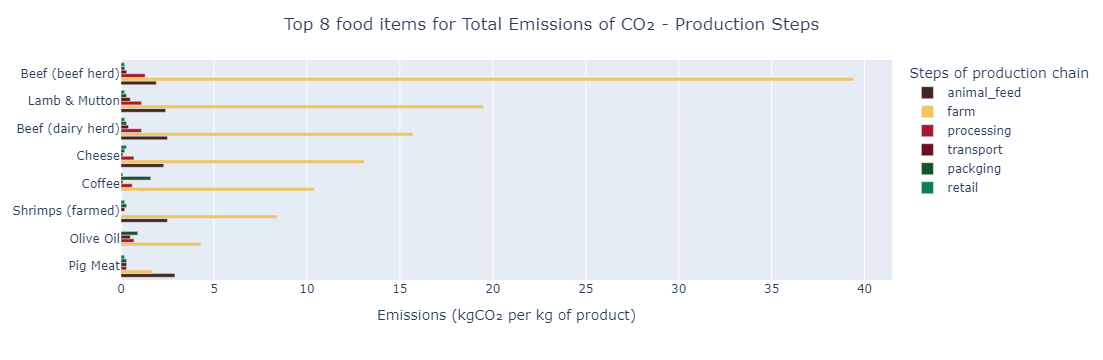

In [40]:
# Columns to be compared
features=['animal_feed', 'farm', 'processing', 'transport', 'packging', 'retail']
colors = ['#412722', '#eec666', '#a51c28', '#6b0f1a', '#1b512d', '#0c7c59']

# Create a dictionary to assign a color to each feature
color_map = {features[n]:colors[n] for n in range(len(colors))}

fig = px.bar(    
    top_8_emiss.sort_values(by=['farm']), 
    y="food_product", 
    x=features,    

    color_discrete_map=color_map,

    hover_name='food_product',
    hover_data=dict(food_product=None))
    

fig.update_layout(    
    barmode='group',

    title = 'Top 8 food items for Total Emissions of CO₂ - Production Steps',
    title_x = 0.5,
    title_y = 0.95,
    title_xanchor='center',
    title_yanchor='top',

    legend_title_text='Steps of production chain',

    xaxis = dict(title='Emissions (kgCO₂ per kg of product)'), 
    yaxis = dict(title=None))

fig.show()

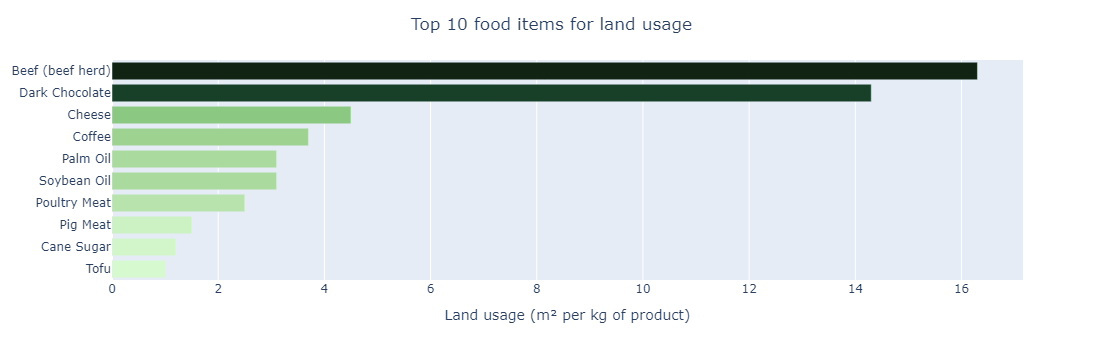

In [41]:
fig = px.bar(    
    df_emiss.sort_values(by=['land_use']).tail(10), # Visualize larger bar on the top of the chart
    y="food_product", 
    x='land_use',

    color='land_use',
    color_continuous_scale='algae',

    hover_name='land_use',
    hover_data=dict(
        food_product=None,
        land_use=None))

fig.update_layout(
    coloraxis_showscale=False,
    
    title = 'Top 10 food items for land usage',
    title_x = 0.5,
    title_y = 0.95,
    title_xanchor='center',
    title_yanchor='top',

    xaxis = dict(title='Land usage (m² per kg of product)'), 
    yaxis = dict(title=None))

fig.show()

In [43]:
#Multiple Machine Learning models, including, Support 
# Vector Machine (SVM), and Naive Bayes (NB), are trained using the training data. 
#These models predict crop yields and production estimates based on the testing 
#data. The performance of the models is evaluated using metrics such as Mean 
#Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error 
#(RMSE), and R-squared (R²).

In [44]:
 # Random Forest (RF)

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
data = pd.read_csv('Food_Production.csv')

In [53]:
data.head()

Food product  Land use change  Animal Feed  Farm  Processing  \
0  Wheat & Rye (Bread)              0.1          0.0   0.8         0.2   
1         Maize (Meal)              0.3          0.0   0.5         0.1   
2        Barley (Beer)              0.0          0.0   0.2         0.1   
3              Oatmeal              0.0          0.0   1.4         0.0   
4                 Rice              0.0          0.0   3.6         0.1   

   Transport  Packging  Retail  Total_emissions  Emission  Freshwater   \
0        0.1       0.1     0.1              1.4       NaN          NaN   
1        0.1       0.1     0.0              1.1       NaN          NaN   
2        0.0       0.5     0.3              1.1       NaN          NaN   
3        0.1       0.1     0.0              1.6  4.281357   183.911552   
4        0.1       0.1     0.1              4.0  9.514379   609.983722   

   Greenhouse gas       Land      Scarcity  
0              NaN       NaN           NaN  
1              NaN       NaN           NaN  
2              NaN       NaN           NaN  
3         0.945482  2.897446   7162.104461  
4         1.207271  0.759631  13449.891480

In [64]:
from sklearn.model_selection import train_test_split
x = data.drop(['Food product'], axis = 1)
y = data['Farm']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [65]:
data.isnull().sum()

Food product        0
Land use change     0
Animal Feed         0
Farm                0
Processing          0
Transport           0
Packging            0
Retail              0
Total_emissions     0
Emission           10
Freshwater         13
Greenhouse gas     10
Land               10
Scarcity           13
dtype: int64

In [66]:
data.describe()

Land use change  Animal Feed       Farm  Processing  Transport  \
count        43.000000    43.000000  43.000000   43.000000  43.000000   
mean          1.260465     0.453488   3.469767    0.253488   0.195349   
std           3.357730     0.919200   7.083264    0.372475   0.158795   
min          -2.100000     0.000000   0.100000    0.000000   0.000000   
25%           0.000000     0.000000   0.350000    0.000000   0.100000   
50%           0.200000     0.000000   0.800000    0.100000   0.100000   
75%           0.800000     0.000000   2.200000    0.300000   0.200000   
max          16.300000     2.900000  39.400000    1.300000   0.800000   

        Packging     Retail  Total_emissions    Emission  Freshwater   \
count  43.000000  43.000000        43.000000   33.000000    30.000000   
mean    0.269767   0.069767         5.972093   27.181547   504.188977   
std     0.342633   0.110270        10.501753   46.445959   539.130695   
min     0.000000   0.000000         0.200000    0.708419     0.723982   
25%     0.100000   0.000000         0.850000    4.214932   106.927557   
50%     0.100000   0.000000         1.600000    7.000000   338.059413   
75%     0.300000   0.150000         6.000000   26.324324   694.805356   
max     1.600000   0.300000        59.600000  197.357143  2062.178771   

       Greenhouse gas         Land      Scarcity  
count        33.000000   33.000000     30.000000  
mean          5.633943   12.423165  17380.575408  
std          10.613575   28.348693  16232.080209  
min           0.069919    0.273756      4.095023  
25%           0.628415    1.312500   2969.124983  
50%           1.351351    2.976244  12605.256790  
75%           5.335135    6.605405  28056.471593  
max          50.946429  119.490842  49735.882350

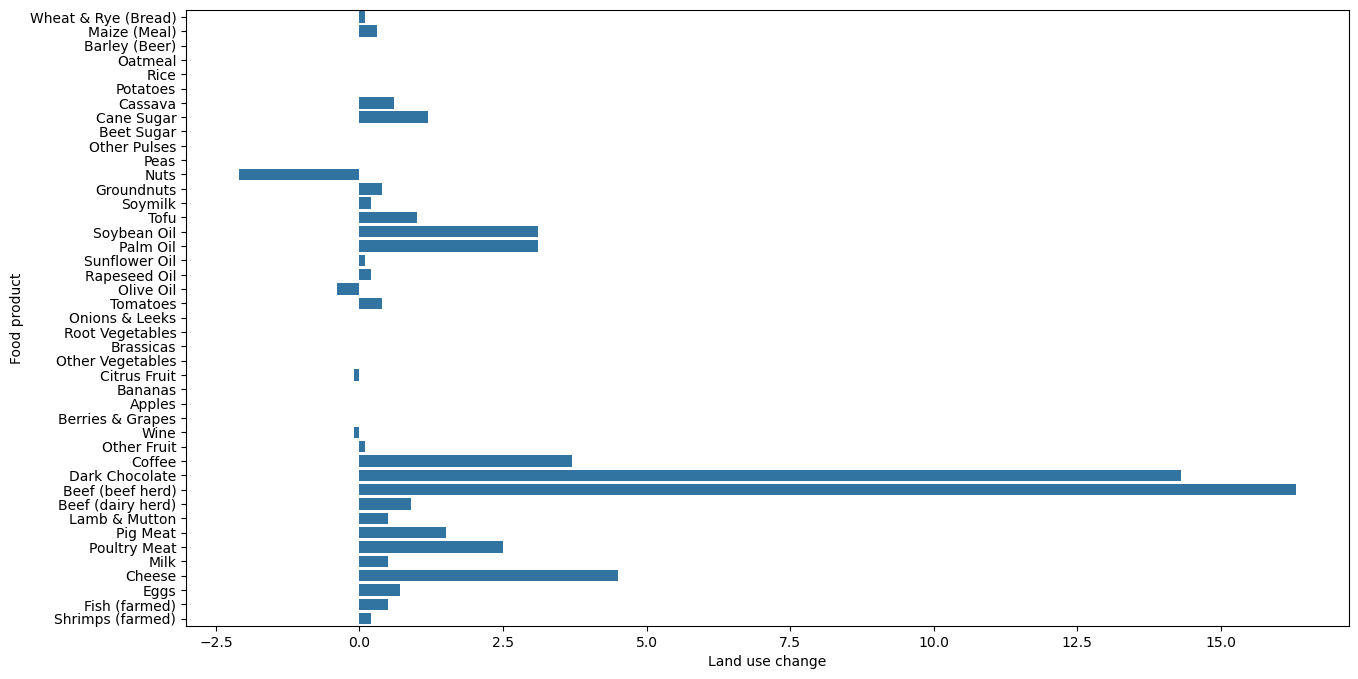

In [68]:
plt.figure(figsize=(15,8))
sns.barplot(x='Land use change', y='Food product', data=data)
plt.show()

In [ ]:
# Maximum land in use is by BEEF HERD in the dataset.

In [69]:
pd.pivot_table(data,index=['Food product'],values=['Farm'], aggfunc=np.mean)

Farm
Food product             
Apples                0.2
Bananas               0.3
Barley (Beer)         0.2
Beef (beef herd)     39.4
Beef (dairy herd)    15.7
Beet Sugar            0.5
Berries & Grapes      0.7
Brassicas             0.3
Cane Sugar            0.5
Cassava               0.2
Cheese               13.1
Citrus Fruit          0.3
Coffee               10.4
Dark Chocolate        3.7
Eggs                  1.3
Fish (farmed)         3.6
Groundnuts            1.4
Lamb & Mutton        19.5
Maize (Meal)          0.5
Milk                  1.5
Nuts                  2.1
Oatmeal               1.4
Olive Oil             4.3
Onions & Leeks        0.2
Other Fruit           0.4
Other Pulses          1.1
Other Vegetables      0.2
Palm Oil              2.1
Peas                  0.7
Pig Meat              1.7
Potatoes              0.2
Poultry Meat          0.7
Rapeseed Oil          2.3
Rice                  3.6
Root Vegetables       0.2
Shrimps (farmed)      8.4
Soybean Oil           1.5
Soymilk               0.1
Sunflower Oil         2.1
Tofu                  0.5
Tomatoes              0.7
Wheat & Rye (Bread)   0.8
Wine                  0.6

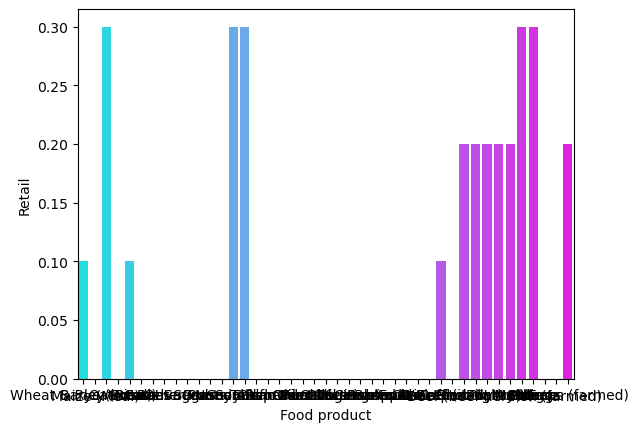

In [70]:
ax = sns.barplot(x='Food product', y='Retail', data=data, palette='cool')

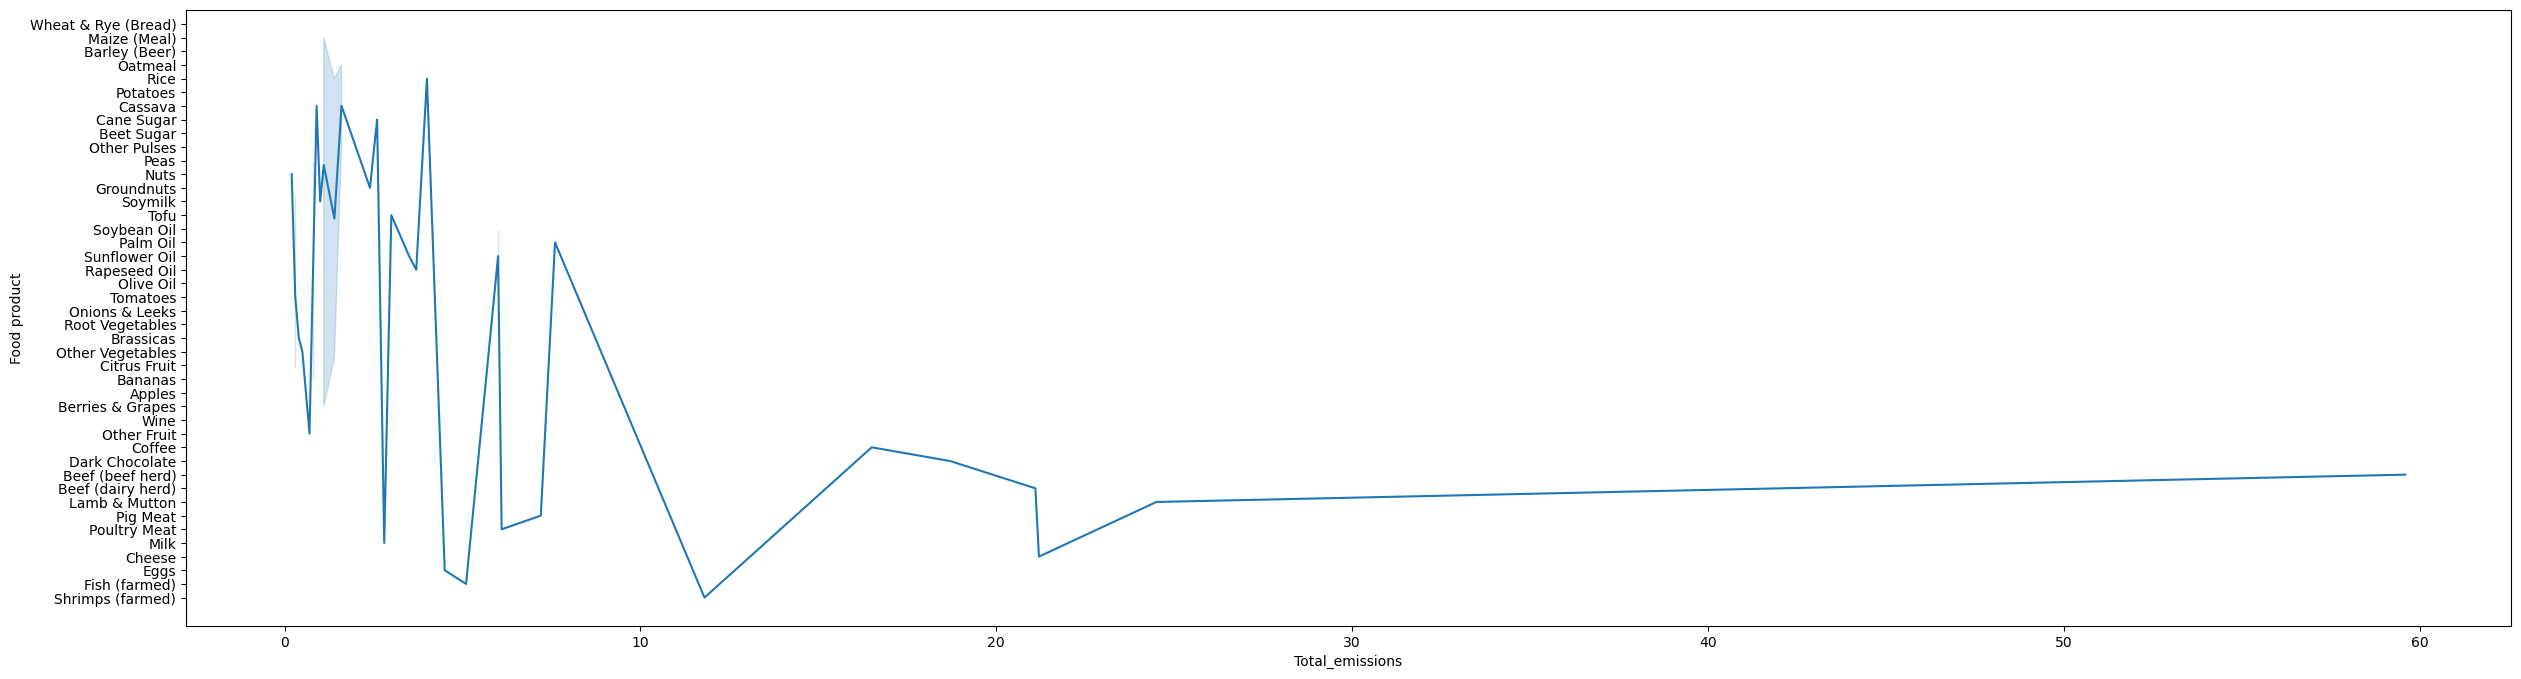

In [71]:
plt.figure(figsize=(30,8))
sns.lineplot(x=data['Total_emissions'], y=data['Food product'])
plt.show()

In [ ]:
# Maximum Total emissions occurs when the for Rice.

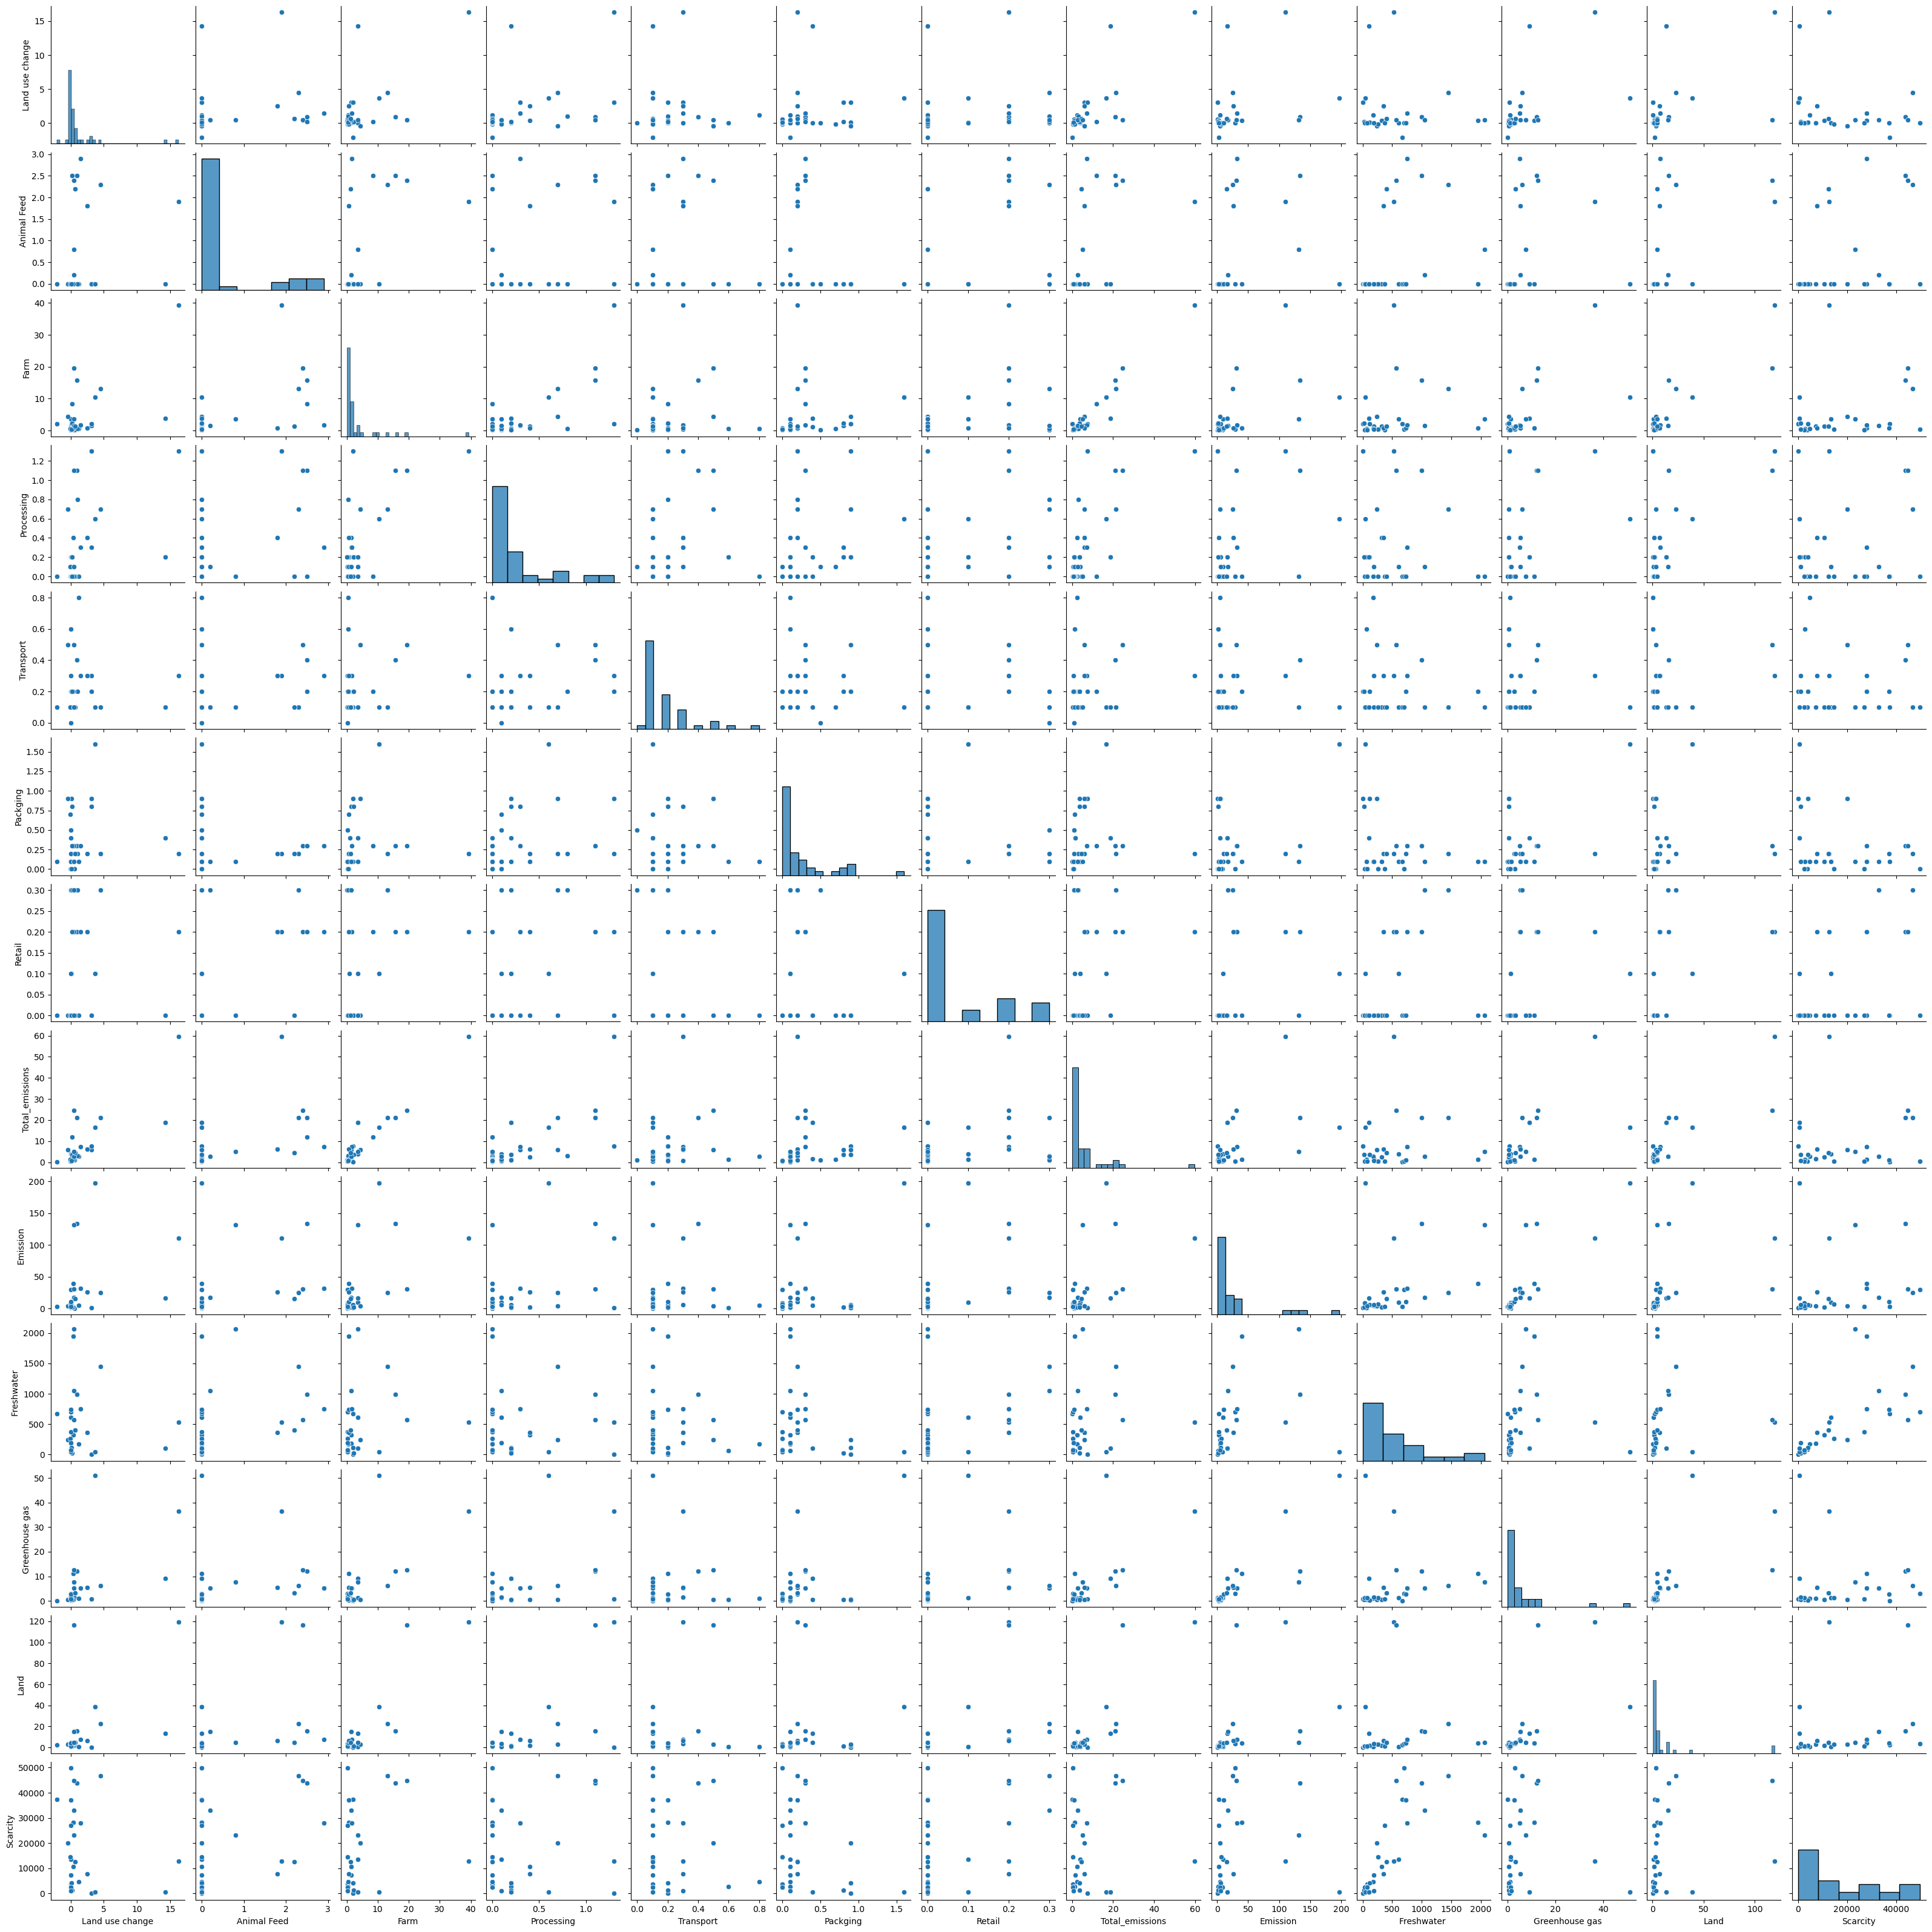

In [72]:
sns.pairplot(data)

In [73]:
data.columns

cols = list(data.columns)
df = data.copy()
df = df[cols[0:2] + cols[3:7] + [cols[2]]]
df.tail()

Food product  Land use change  Farm  Processing  Transport  Packging  \
38              Milk              0.5   1.5         0.1        0.1       0.1   
39            Cheese              4.5  13.1         0.7        0.1       0.2   
40              Eggs              0.7   1.3         0.0        0.1       0.2   
41     Fish (farmed)              0.5   3.6         0.0        0.1       0.1   
42  Shrimps (farmed)              0.2   8.4         0.0        0.2       0.3   

    Animal Feed  
38          0.2  
39          2.3  
40          2.2  
41          0.8  
42          2.5

In [ ]:
# Note: Correlation >= 0.7 there is a coherent relationship between variables. Correlation < 0.2 there is no close relationship between variables.

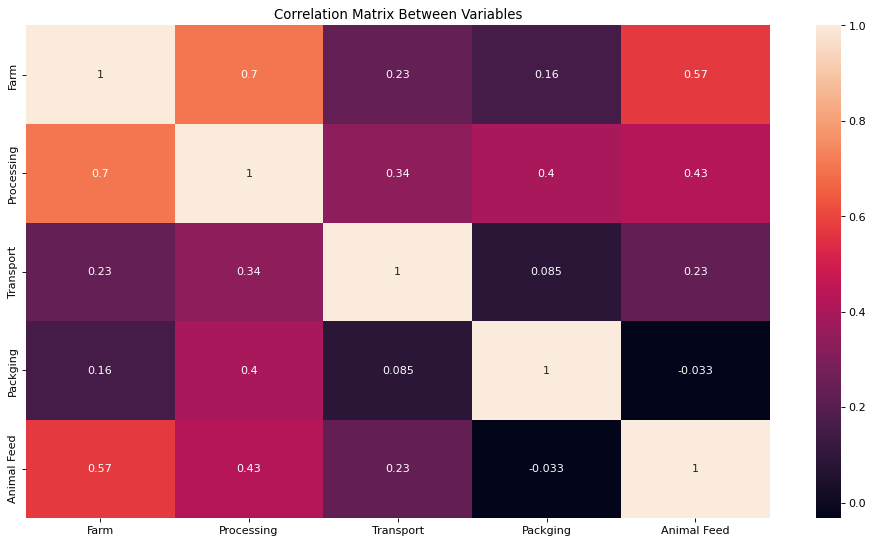

In [77]:
fig, ax = plt.subplots(figsize=(15,8), dpi=80)
sns.heatmap(df.loc[:, 'Farm':'Animal Feed'].corr(), cmap='rocket', annot=True)
plt.title('Correlation Matrix Between Variables')
plt.show()

In [78]:
from sklearn.preprocessing import OneHotEncoder
string_feat = ['Food product']
ohe = OneHotEncoder()
ohe.fit(df[string_feat])
data_ohe_res = pd.DataFrame(ohe.transform(df[string_feat]).toarray(),
                          columns=ohe.get_feature_names_out())
df = pd.concat([df, data_ohe_res], axis=1)
df = df.drop(columns=string_feat)
df.head()

Land use change  Farm  Processing  Transport  Packging  Animal Feed  \
0              0.1   0.8         0.2        0.1       0.1          0.0   
1              0.3   0.5         0.1        0.1       0.1          0.0   
2              0.0   0.2         0.1        0.0       0.5          0.0   
3              0.0   1.4         0.0        0.1       0.1          0.0   
4              0.0   3.6         0.1        0.1       0.1          0.0   

   Food product_Apples  Food product_Bananas  Food product_Barley (Beer)  \
0                  0.0                   0.0                         0.0   
1                  0.0                   0.0                         0.0   
2                  0.0                   0.0                         1.0   
3                  0.0                   0.0                         0.0   
4                  0.0                   0.0                         0.0   

   Food product_Beef (beef herd)  Food product_Beef (dairy herd)  \
0                            0.0                             0.0   
1                            0.0                             0.0   
2                            0.0                             0.0   
3                            0.0                             0.0   
4                            0.0                             0.0   

   Food product_Beet Sugar  Food product_Berries & Grapes  \
0                      0.0                            0.0   
1                      0.0                            0.0   
2                      0.0                            0.0   
3                      0.0                            0.0   
4                      0.0                            0.0   

   Food product_Brassicas  Food product_Cane Sugar  Food product_Cassava  \
0                     0.0                      0.0                   0.0   
1                     0.0                      0.0                   0.0   
2                     0.0                      0.0                   0.0   
3                     0.0                      0.0                   0.0   
4                     0.0                      0.0                   0.0   

   Food product_Cheese  Food product_Citrus Fruit  Food product_Coffee  \
0                  0.0                        0.0                  0.0   
1                  0.0                        0.0                  0.0   
2                  0.0                        0.0                  0.0   
3                  0.0                        0.0                  0.0   
4                  0.0                        0.0                  0.0   

   Food product_Dark Chocolate  Food product_Eggs  Food product_Fish (farmed)  \
0                          0.0                0.0                         0.0   
1                          0.0                0.0                         0.0   
2                          0.0                0.0                         0.0   
3                          0.0                0.0                         0.0   
4                          0.0                0.0                         0.0   

   Food product_Groundnuts  Food product_Lamb & Mutton  \
0                      0.0                         0.0   
1                      0.0                         0.0   
2                      0.0                         0.0   
3                      0.0                         0.0   
4                      0.0                         0.0   

   Food product_Maize (Meal)  Food product_Milk  Food product_Nuts  \
0                        0.0                0.0                0.0   
1                        1.0                0.0                0.0   
2                        0.0                0.0                0.0   
3                        0.0                0.0                0.0   
4                        0.0                0.0                0.0   

   Food product_Oatmeal  Food product_Olive Oil  Food product_Onions & Leeks  \
0                   0.0                     0.0                          0.0   
1     

In [81]:
df = df.drop(columns='Transport')
df.tail()

Farm  Processing  Packging  Animal Feed  Food product_Apples  \
38   1.5         0.1       0.1          0.2                  0.0   
39  13.1         0.7       0.2          2.3                  0.0   
40   1.3         0.0       0.2          2.2                  0.0   
41   3.6         0.0       0.1          0.8                  0.0   
42   8.4         0.0       0.3          2.5                  0.0   

    Food product_Bananas  Food product_Barley (Beer)  \
38                   0.0                         0.0   
39                   0.0                         0.0   
40                   0.0                         0.0   
41                   0.0                         0.0   
42                   0.0                         0.0   

    Food product_Beef (beef herd)  Food product_Beef (dairy herd)  \
38                            0.0                             0.0   
39                            0.0                             0.0   
40                            0.0                             0.0   
41                            0.0                             0.0   
42                            0.0                             0.0   

    Food product_Beet Sugar  Food product_Berries & Grapes  \
38                      0.0                            0.0   
39                      0.0                            0.0   
40                      0.0                            0.0   
41                      0.0                            0.0   
42                      0.0                            0.0   

    Food product_Brassicas  Food product_Cane Sugar  Food product_Cassava  \
38                     0.0                      0.0                   0.0   
39                     0.0                      0.0                   0.0   
40                     0.0                      0.0                   0.0   
41                     0.0                      0.0                   0.0   
42                     0.0                      0.0                   0.0   

    Food product_Cheese  Food product_Citrus Fruit  Food product_Coffee  \
38                  0.0                        0.0                  0.0   
39                  1.0                        0.0                  0.0   
40                  0.0                        0.0                  0.0   
41                  0.0                        0.0                  0.0   
42                  0.0                        0.0                  0.0   

    Food product_Dark Chocolate  Food product_Eggs  \
38                          0.0                0.0   
39                          0.0                0.0   
40                          0.0                1.0   
41                          0.0                0.0   
42                          0.0                0.0   

    Food product_Fish (farmed)  Food product_Groundnuts  \
38                         0.0                      0.0   
39                         0.0                      0.0   
40                         0.0                      0.0   
41                         1.0                      0.0   
42                         0.0                      0.0   

    Food product_Lamb & Mutton  Food product_Maize (Meal)  Food product_Milk  \
38                         0.0                        0.0                1.0   
39                         0.0                        0.0                0.0   
40                         0.0                        0.0                0.0   
41                         0.0                        0.0                0.0   
42                         0.0                        0.0                0.0   

    Food product_Nuts  Food product_Oatmeal  Food product_Olive Oil  \
38                0.0                   0.0                     0.0   
39                0.0                   0.0                     0.0   
40                0.0                   0.0                     0.0   
41                0.0                   0.0                     0.0   
42                0.0                   

In [83]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [185]:
# Example: Load your dataset
data = pd.read_csv('FAOSTAT_data_1-10-2022.csv')
data.head()


Domain Code              Domain  Area Code (FAO)         Area  Element Code  \
0          ET  Temperature change                2  Afghanistan          7271   
1          ET  Temperature change                2  Afghanistan          7271   
2          ET  Temperature change                2  Afghanistan          7271   
3          ET  Temperature change                2  Afghanistan          7271   
4          ET  Temperature change                2  Afghanistan          7271   

              Element  Months Code   Months  Year Code  Year Unit  Value Flag  \
0  Temperature change         7001  January       1961  1961   ?C  0.746   Fc   
1  Temperature change         7001  January       1962  1962   ?C  0.009   Fc   
2  Temperature change         7001  January       1963  1963   ?C  2.695   Fc   
3  Temperature change         7001  January       1964  1964   ?C -5.277   Fc   
4  Temperature change         7001  January       1965  1965   ?C  1.827   Fc   

  Flag Description  
0  Calculated data  
1  Calculated data  
2  Calculated data  
3  Calculated data  
4  Calculated data

In [186]:
data.shape

(229925, 14)

In [187]:
data = data.fillna(0)

In [212]:
# Exclude non-numeric columns (e.g., 'Meteorological year')
X = data.drop(['Area Code (FAO)'], axis=1)  # Replace with actual non-numeric columns
y = data['Value']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [213]:
data.head()

Area Code (FAO)  Element Code  Months Code  Year Code  Year  Value
0                2          7271         7001       1961  1961  0.746
1                2          7271         7001       1962  1962  0.009
2                2          7271         7001       1963  1963  2.695
3                2          7271         7001       1964  1964 -5.277
4                2          7271         7001       1965  1965  1.827

In [214]:
# Train the model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest - MAE: {mae_rf}, MSE: {mse_rf}, RMSE: {rmse_rf}, R²: {r2_rf}')


Random Forest - MAE: 7.494291616903953e-05, MSE: 1.2611284825486769e-05, RMSE: 0.0035512370838183655, R²: 0.9999879974537884


In [215]:
from sklearn.ensemble import RandomForestRegressor

# Example: Using RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest Regressor - MAE: {mae_rf}, MSE: {mse_rf}, RMSE: {rmse_rf}, R²: {r2_rf}')




Random Forest Regressor - MAE: 7.494291616903953e-05, MSE: 1.2611284825486769e-05, RMSE: 0.0035512370838183655, R²: 0.9999879974537884


In [216]:
print("\nModel Performance Summary:")
print(f"Random Forest - MAE: {mae_rf}, MSE: {mse_rf}, RMSE: {rmse_rf}, R²: {r2_rf}")
print(f"Support Vector Machine - MAE: {mae_svm}, MSE: {mse_svm}, RMSE: {rmse_svm}, R²: {r2_svm}")



Model Performance Summary:
Random Forest - MAE: 7.494291616903953e-05, MSE: 1.2611284825486769e-05, RMSE: 0.0035512370838183655, R²: 0.9999879974537884
Support Vector Machine - MAE: 0.9755670733055521, MSE: 3.2863648312719893, RMSE: 1.8128333710719222, R²: -0.22829250338238816


## End Document